In [2]:
import pandas as pd

# Input path and filename
path = 'D:/Git_Projects/5. Master_thesis/Datasets/'

# Load files into a pandas dataframes
file = path + 'Dataset.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

# Set index
df = df.set_index("Date")

In [3]:
df

,Orders,GDP,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
Date,,,,,,,,
2011-01-01,901,47117,100.73760,3.037052,8.3,3.270000,1.460000,14993
2011-02-01,671,47117,100.75380,3.329970,8.1,3.410000,1.460000,10270
2011-03-01,917,47117,100.68170,3.300893,8.9,3.450000,1.516667,13927
2011-04-01,785,49810,100.43610,3.160000,7.6,3.570000,1.526667,12491
2011-05-01,764,49810,99.90539,3.344348,7.7,3.320000,1.540000,14219
...,...,...,...,...,...,...,...,...
2022-04-01,316,68572,96.66453,5.738172,6.3,1.177000,2.216667,7220
2022-05-01,224,68572,95.99726,6.962626,6.1,1.451962,2.320000,8798
2022-06-01,231,68572,95.40240,7.792331,6.9,2.072276,2.560000,8305


In [4]:
df.describe()

,Orders,GDP,CCI,CPI,Unemployment_rate,Long_term_interest_rates,Avg_Fuel_Price,TIV
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,548.921429,55825.407143,99.492667,1.582442,8.054286,0.946106,1.556071,10213.071429
std,208.520139,5366.764733,1.723523,1.630154,0.918583,0.975536,0.202376,2358.765674
min,118.000000,47117.000000,94.494900,-0.591473,5.900000,-0.410000,1.266667,4286.000000
25%,402.750000,51546.000000,98.494103,0.593841,7.275000,0.176818,1.436667,8875.750000
50%,536.000000,55558.000000,99.145910,1.107289,8.200000,0.665000,1.526667,9962.500000
75%,672.000000,59209.500000,100.705950,2.262171,8.800000,1.695964,1.610833,11221.750000
max,1268.000000,68572.000000,102.737500,7.792331,9.900000,3.570000,2.560000,25629.000000


In [5]:
dep_var = 'TIV'  # Dependant variable (TIV or Orders)

In [6]:
import plotly.graph_objs as go

title = dep_var + ' 2011–2022'

fig= go.Figure()
fig.add_trace(go.Scatter(dict(x=df.index, y=df[dep_var], mode='lines+markers', name= 'Train')))
fig.update_layout(title=go.layout.Title(
 text=title,
 xref='paper',x=0),
 margin=dict(l=10, r=0, t=50, b=50),
 xaxis=go.layout.XAxis(title=go.layout.xaxis.Title(text='Date',font=dict(
 family='Courier New, monospace',
 size=18,
 color='#7f7f7f'))),
 yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text='Cars',font=dict(
 family='Courier New, monospace',
 size=18,
 color='#7f7f7f'))))
fig.show()

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

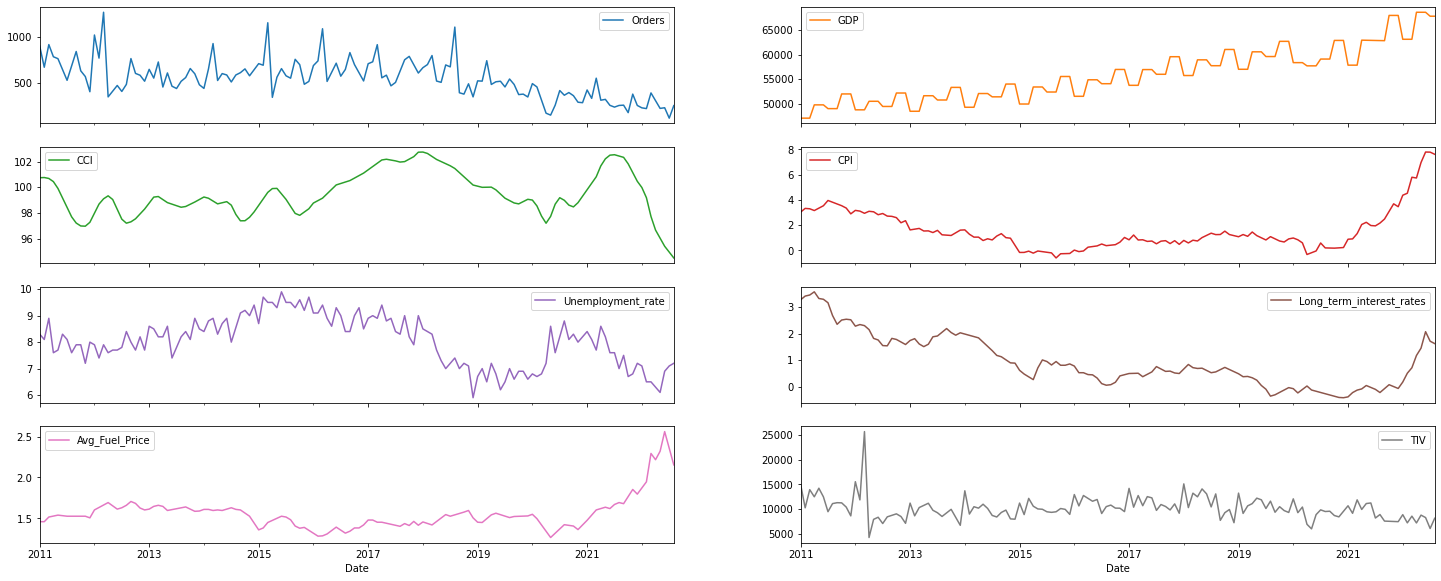

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fast')
plt.rcParams["figure.figsize"] = [25, 15]
df.plot(legend=True, subplots=True, layout=(6,2))

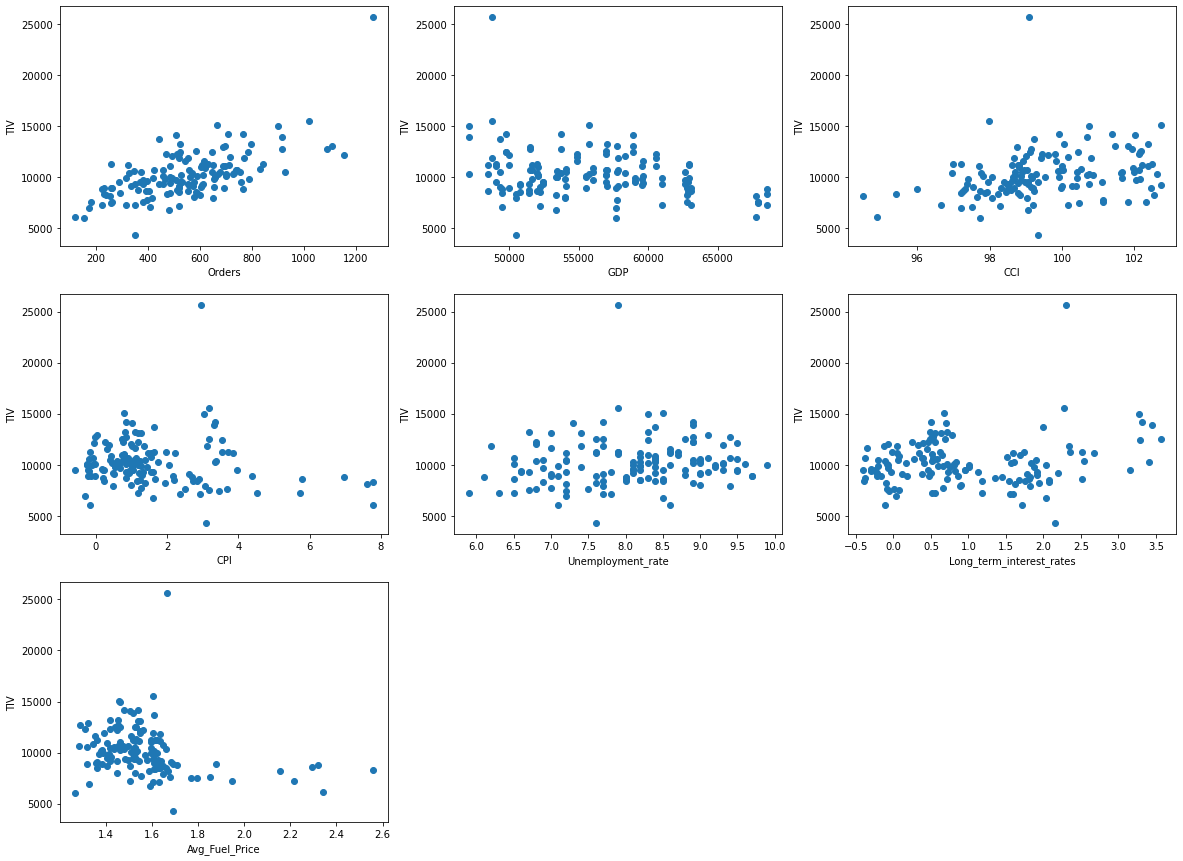

In [8]:
# Define a function to plot the scatterplots of the relationships between 
# all independent variables and the dependent variable
def plot_relationships(df, num_cols):
    
    ind_var = df.loc[:, df.columns != dep_var]  # Independant variables
    figs = len(df.columns) - 1                  # Number of figures 

    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    
    fig = 1
    plt.figure(figsize=(20,15))
    
    # Loop through all independent variables and create the scatter plot
    for i in ind_var:
        plt.subplot(num_rows, num_cols, fig)
        plt.scatter(df[i], df[dep_var])
        plt.xlabel(str(i))
        plt.ylabel(str(dep_var))
        fig +=1

plot_relationships(df,3)

<AxesSubplot:>

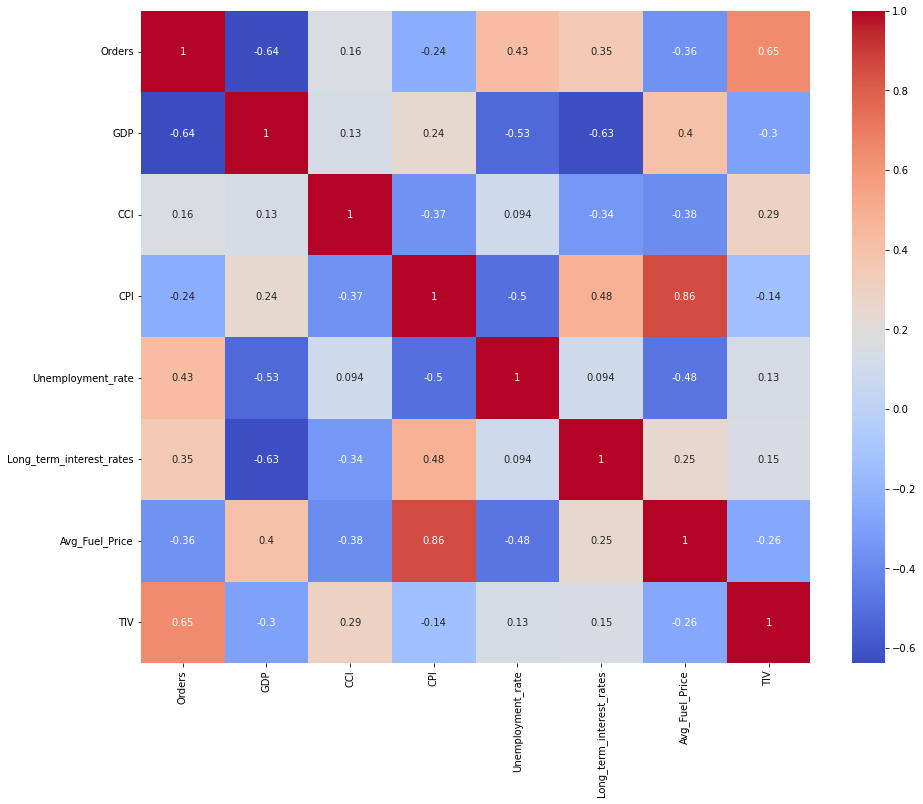

In [9]:
# Import seaborn
import seaborn as sns

# Plot the correlations as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

array([[<AxesSubplot:title={'center':'Orders'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'CCI'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment_rate'}>,
        <AxesSubplot:title={'center':'Long_term_interest_rates'}>],
       [<AxesSubplot:title={'center':'Avg_Fuel_Price'}>,
        <AxesSubplot:title={'center':'TIV'}>, <AxesSubplot:>]],
      dtype=object)

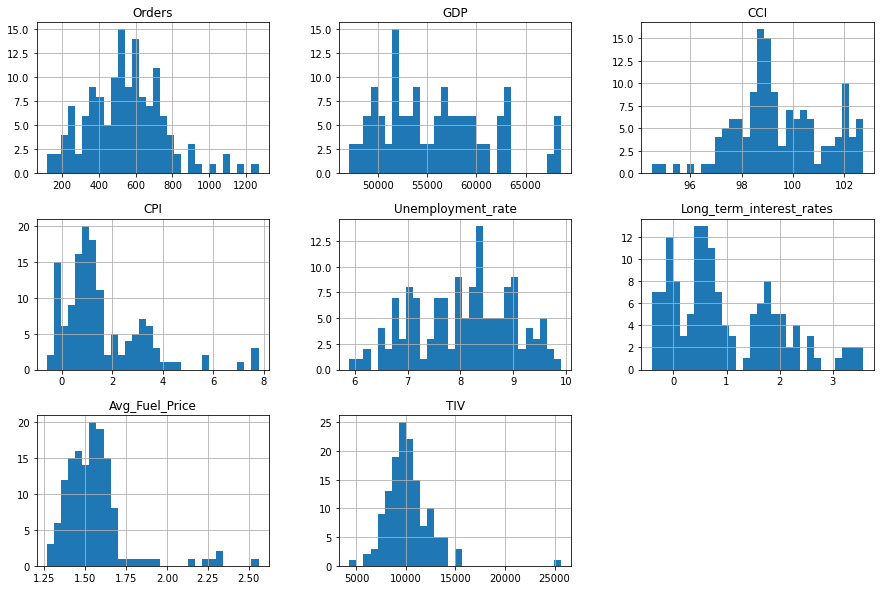

In [10]:
df.hist(bins=30, figsize=(15, 10))

In [11]:
# Remove outliers
df = df[(df['TIV'] < 17000) & (df['TIV'] > 5000)]
df = df[df['CPI'] < 5]
df = df[(df['Orders'] < 950)]

array([[<AxesSubplot:title={'center':'Orders'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'CCI'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment_rate'}>,
        <AxesSubplot:title={'center':'Long_term_interest_rates'}>],
       [<AxesSubplot:title={'center':'Avg_Fuel_Price'}>,
        <AxesSubplot:title={'center':'TIV'}>, <AxesSubplot:>]],
      dtype=object)

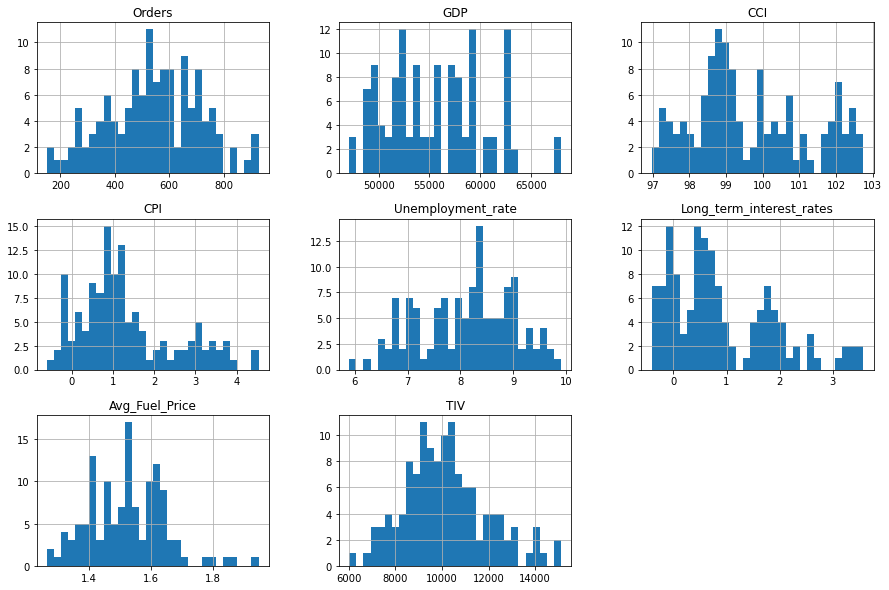

In [12]:
df.hist(bins=30, figsize=(15, 10))

<AxesSubplot:>

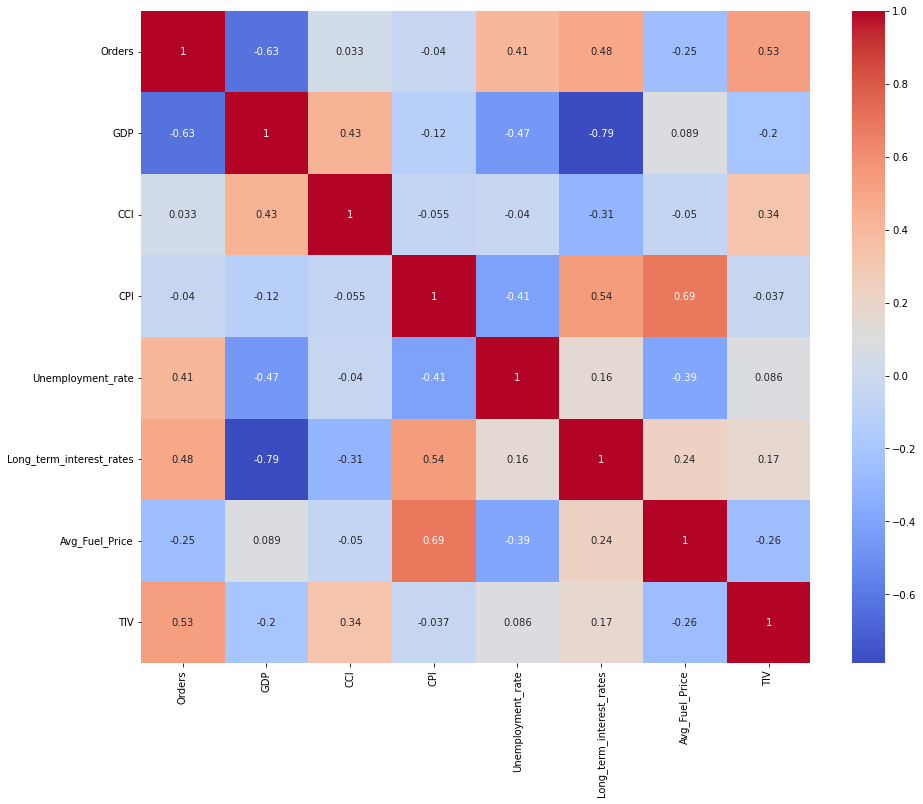

In [13]:
# Plot the correlations as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

In [14]:
# Save data to Excel so we don't need to run these steps every time
df.to_excel("Datasets/Dataset_outliers.xlsx") 